# Import Data from Pandas and other module

The first thing to do to work with external data is to correctly install and import the necessary modules.
For this work we will mainly use the pandas and numpy library. Matplotlib will be used later to display data in graphs

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import geopandas as gpd
import geopy
from  geopy.geocoders import Nominatim
import folium
from function import * # to import the functions created in the function.py file

In [2]:
df = pd.read_csv('input/attacks.csv', encoding = 'latin-1')

In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
# Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [5]:
# Return a tuple representing the dimensionality of the DataFrame
df.shape

(25723, 24)

##  Dataframe filtering process 1/2
This step it's the most important. You need to look the DataFrame and clean the Data from incorrect values.
You can see that there are a lot of columns with multiple *NaN* values, or where the data are they need to be converted before they can be used properly

In [6]:
# The column labels of the DataFrame
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
# Detect missing values. Return a boolean output
df.isnull().sum().sort_values(ascending=False).head(5)

Unnamed: 22    25722
Unnamed: 23    25721
Time           22775
Species        22259
Age            22252
dtype: int64

In [8]:
# First filtering of data with the choice of columns useful for carrying out our hypothesis
small_df = df[['Year', 'Country', 'Area', 'Location', 'Activity', 'Fatal (Y/N)', 'Injury','Species ']]

In [9]:
# Check small Dataset
small_df.head(5)

,Year,Country,Area,Location,Activity,Fatal (Y/N),Injury,Species
0,2018.0,USA,California,"Oceanside, San Diego County",Paddling,N,"No injury to occupant, outrigger canoe and pad...",White shark
1,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,N,Minor injury to left thigh,NaN
2,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,N,Injury to left lower leg from surfboard skeg,NaN
3,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,N,Minor injury to lower leg,2 m shark
4,2018.0,MEXICO,Colima,La Ticla,Free diving,N,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m"


In [10]:
# Remove row where all values are None
small_df = small_df.dropna(how='all') 

In [11]:
# Show you the datatype of every columns
dataTypeSeries = small_df.dtypes
print(dataTypeSeries)

Year           float64
Country         object
Area            object
Location        object
Activity        object
Fatal (Y/N)     object
Injury          object
Species         object
dtype: object


In [12]:
# WARNING
# This command expand the output display to see more columns of a pandas DataFrame
#-----------------------pd.set_option('display.max_rows', None)

##  Dataframe filtering process 2/2

Column by column you will have to clean the data, group it into categories.
Above all, be careful not to lose important data in this selection process

In [13]:
# Analyze a series and check how to reorganize the data; 
# look for information common to the recurring fields or patterns
display(small_df['Species '].value_counts(dropna = False).head(20))

NaN                                                   2838
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
Tiger shark                                             73
Shark involvement prior to death unconfirmed            68
Bull shark                                              52
4' shark                                                40
6' shark                                                40
1.8 m [6'] shark                                        35
Questionable incident                                   35
Questionable                                            34
1.5 m [5'] shark                                        32
1.2 m [4'] shark                                        27
5' shark                                                26
3' shark                                                

In [14]:
# It is possible to find the NaN values and change them
small_df['Species '] = small_df['Species '].fillna('No Values')
# as well as changing the name of a column
small_df = small_df.rename({'Species ':'Species'}, axis=1)

##  Classification method of the column *'Species'*
Below is the work organization methodology

It has been chosen to maintain **16 species of sharks**, which reflect almost all of the shark population present in this dataset.
Incomplete or missing data will be placed in a special *Other* category. It was decided to include in this category also sharks that had only the information of size for two issues:
* The species was not reliable only on the basis of the size of the revelation (present in meters and in feet).
* Often an absolute measurement is not provided, but there is a range, easily overlapping between categories

In [15]:
# The 16 species of sharks have been placed in a string. 
#The data of the species column will be iterated, to search in each row for matches with these keywords. 
#If matches are found the shark will be classified in that species, otherwise it will be classified as 'Other'

shark_species = '''White Tiger Bull Blacktip Blue Mako Bronze Raggedtooth Nurse Grey Zambesi Hammerhead
                Sandtiger Basking Lemon Spinner'''

shark_column = []


# Run the function categorize_shark_column to clear the column data           
categorize_shark_column(shark_species, shark_column, *small_df['Species'])

# At this point the column is overwritten, which will contain the new data
small_df['Species'] = shark_column

In [16]:
# Check the results. The data are much less scattered
# The resulting object will be in descending order so that the first element is the most frequently-occurring 
#element. Excludes NA values by default (dropna = False to change this).
display(small_df['Species'].value_counts(dropna = False).head(10))

No Values         2840
Other             1788
White shark        635
Tiger shark        255
Bull shark         182
Blacktip shark      98
Bronze shark        66
Grey shark          57
Nurse shark         57
Mako shark          55
Name: Species, dtype: int64

##  Classification method of the column *'Activities'*
Below is the work organization methodology

It has been chosen to maintain **14 activities**, which reflect almost all the main cases reported in this dataset
Incomplete or missing data will be placed in a special *Other* category.

In [17]:
# The results seem quite ordered, but if we expand the data there are more than 300 different values.
display(small_df.Activity.value_counts(dropna = False).head(10))

Surfing         971
Swimming        869
NaN             544
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Name: Activity, dtype: int64

In [18]:
# Find the NaN values and change them
small_df['Activity'] = small_df['Activity'].fillna('No Values')

# Basically the same previous methodology

categories = '''Surfing Swimming Fishing Spearfishing Bathing Wading Diving 
                Standing Snorkeling Kite Scuba Boarding Kayaking Windsurfing'''

# Run the function categorize_activity_column to clear the column data  
activities_column = []
            
categorize_activity_column(categories, activities_column, *small_df['Activity'])
small_df['Activity'] = activities_column

In [19]:
display(small_df.Activity.value_counts())

Other    1536
Surf     1165
Swim     1108
Fish      704
Spea      416
Divi      406
Bath      190
Wadi      168
Boar      147
Stan      145
Scub      123
Snor       94
Kaya       57
Wind       22
Kite       21
Name: Activity, dtype: int64

In [20]:
# The correspondence of the words was made using only the first 4 letters, 
# because of too many different variations between the words (infinitive or -ing type).
# For this it's better to update the previously assigned name
# Run the function update_categories_values_table to clear the column data  

update_categories_values_table('Activity',small_df, categories)

/home/must4in3/Desktop/Ironhack_Project/1 - Project - Shark/SharkPandas/function.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset[f"{str_name_column}"][Dataset[f"{str_name_column}"].str.startswith(f"{c[:4]}")] = f"{c}"


In [21]:
display(small_df.head(5))

,Year,Country,Area,Location,Activity,Fatal (Y/N),Injury,Species
0,2018.0,USA,California,"Oceanside, San Diego County",Other,N,"No injury to occupant, outrigger canoe and pad...",White shark
1,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,N,Minor injury to left thigh,No Values
2,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,N,Injury to left lower leg from surfboard skeg,No Values
3,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,N,Minor injury to lower leg,Other
4,2018.0,MEXICO,Colima,La Ticla,Diving,N,Lacerations to leg & hand shark PROVOKED INCIDENT,Tiger shark


In [22]:
# Column check
display(small_df.Activity.value_counts(dropna = False).head(10))

Other           1536
Surfing         1165
Swimming        1108
Fishing          704
Spearfishing     416
Diving           406
Bathing          190
Wading           168
Boarding         147
Standing         145
Name: Activity, dtype: int64

In [23]:
# Export table
small_df.to_csv('output/clean_shark_table.csv')

##  Classification method of the column *'Injury'*

In [24]:
small_df["Injury"].value_counts().head(10)

FATAL                      802
Survived                    97
Foot bitten                 87
No injury                   82
Leg bitten                  72
Left foot bitten            50
No details                  43
Right foot bitten           39
No injury, board bitten     31
Hand bitten                 29
Name: Injury, dtype: int64

In [25]:
# Find the NaN values and change them
small_df['Injury'] = small_df['Injury'].fillna('No Values')

# IMPORTANT
#Another way to update the columns is as follows:
#The problem with this methodology is that it categorizes the type of injury with a single attribute, 
#when instead at the time of the accident various parts of the body may be involved

#for c in categories:
#    small_df["Injury"][small_df['Injury'].str.contains(f'{c}|{c.lower()}|{c.upper()}|{c.title()}')] = f'{c}'


# So basically I used the same previous methodology

categories_1 = ['Fatal', 'Survived', 'Foot', 'No injury', 'Leg', 'Hand', 'Buttock', 'Finger', 'Head', 'Hip',
              'Thigh', 'Calf', 'Arm', 'Ankle', 'Heel', 'Torso', 'Elbow', 'Back', 'Knee', 'Chest', 'Toe']


activities_column = []        
                
categorize_injury_column(categories_1, activities_column, *small_df['Injury'])
small_df["Injury"] = activities_column


In [26]:
small_df["Injury"].value_counts().head(10)

Fatal        1040
Unknown       777
No Injury     766
Foot          551
Leg           543
Arm           348
Hand          272
Thigh         208
Calf          162
Survived      130
Name: Injury, dtype: int64

In [27]:
# Final Step Data Cleaning
display(small_df.head())

,Year,Country,Area,Location,Activity,Fatal (Y/N),Injury,Species
0,2018.0,USA,California,"Oceanside, San Diego County",Other,N,No Injury,White shark
1,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,N,Thigh,No Values
2,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,N,Leg,No Values
3,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,N,Leg,Other
4,2018.0,MEXICO,Colima,La Ticla,Diving,N,Leg Hand,Tiger shark


##  Data analysis

First we want to analyze the data of the last 50 years, to try to understand the magnitude of the phenomenon.
Let us first look for the three nations where shark attacks occurred most frequently.
Finding the geographic area among the most affected in the world will allow us to quickly reach the target of the job, and make our hypotheses

##  We are looking for the Country with the most shark attacks in the past 50 years

In [28]:
# Create a sub-Dataset
shark_attack_after1950 = small_df[(small_df["Year"] >= 1950)]

In [29]:
# Group DataFrame using a mapper or by a Series of columns.
# Aggregate using one or more operations over the specified axis.
country_analysis = shark_attack_after1950.groupby("Country").agg({'Activity':"count"})
display(country_analysis.sort_values(by=['Activity'], ascending = False).head(3))

,Activity
Country,
USA,1870
AUSTRALIA,800
SOUTH AFRICA,469


In [30]:
# Create 3 sub-sets of these 3 countries to display them with a line graph and visually compare the results
filtered_Usa = shark_attack_after1950[(shark_attack_after1950['Country']=='USA')] 
filtered_Australia = shark_attack_after1950[(shark_attack_after1950['Country']=='AUSTRALIA' )]
filtered_South_Africa = shark_attack_after1950[(shark_attack_after1950['Country']=='SOUTH AFRICA')]

Text(0.5, 0, 'Years')

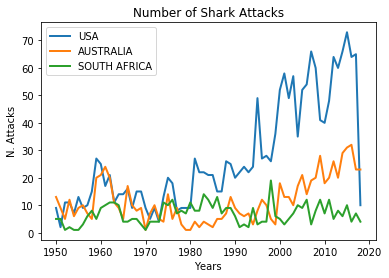

In [31]:
# USA
%matplotlib inline
usa_graph = filtered_Usa.Year.value_counts().sort_index().plot(linewidth=2, markersize=12)
filtered_Australia.Year.value_counts().sort_index().plot(linewidth=2, markersize=12)
filtered_South_Africa.Year.value_counts().sort_index().plot(linewidth=2, markersize=12)
# Insert legend, title, xy labels
usa_graph.legend(['USA','AUSTRALIA','SOUTH AFRICA'])
usa_graph.set_title('Number of Shark Attacks')
usa_graph.set_ylabel('N. Attacks')
usa_graph.set_xlabel('Years')
#USA is the country with the most shark attacks in the past 50 years. 
#The data of the last year make us think of an outlier value, on average they are always considerably higher 
# than in South Africa and Australia

##  Total number of Shark attacks in the past 50 years in every counties of the US

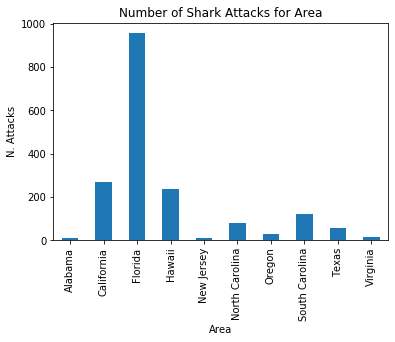

In [32]:
# Bar chart showing the situation in the counties of the US. 
# Only the top 10 sorted by number of cases are represented in the graph
counties_US_graph = filtered_Usa['Area'].value_counts().head(10).sort_index().plot.bar()
counties_US_graph.set_title('Number of Shark Attacks for Area')
counties_US_graph.set_xlabel('Area')
counties_US_graph.set_ylabel('N. Attacks')
display(counties_US_graph)

##  Geolocation of shark attacks on Florida beaches
The table contains detailed information on the location of the area in which the attack took place.
Using geopandas, geopy and a module called Nominatim it is possible to trace the geographical coordinates of these places, in order to map the individual events

In [33]:
# Create 4 variables and in each of them we save the information of each useful column.
#The zip method will allow us to gather all the data together
df_Florida = filtered_Usa[(filtered_Usa["Area"] == 'Florida')]
address = (df_Florida['Location'].tolist())
area =(df_Florida['Area'].tolist())
activity = (df_Florida['Activity'].tolist())
species = (df_Florida['Species'].tolist())
address_complete = (list(zip(address, area)))
other_info = list(zip(activity, species))

In [34]:
geolocator = Nominatim()

/home/must4in3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [35]:
# Each event will be displayed with a circle on the map.
# The color of each circle will be different depending on the person's activity at the time of the event.
# In this way we would have a clear overview of the magnitude of the events
# For this reason, a dictionary is created that associates a color with each activity
color_activity = {'Surfing': 'red', 'Swimming':'blue', 'Fishing':'yellow', 
                  'Spearfishing': 'black', 'Bathing':'gray', 'Wading': 'pink' ,
                  'Diving': 'black','Standing':'orange', 'Snorkeling': 'white',
                  'Kite': 'violet', 'Scuba':'green', 'Boarding': 'brown',
                  'Kayaking': 'teal', 'Windsurfing': 'purple', 'Other':'cyan'}

# We create a loop that allows us to iterate all the addresses extracted previously, and receive the 
#latitude and longitude information and save it in another dictionary.
# I only extract the first 40 coordinates as a test
geo_address = {}

for i,x in enumerate(address_complete[:40]):
    try:
        loc = geolocator.geocode(f'{x[0]},{x[1]}')
        geo_address[f'{x}'] = {"latitude" : loc.latitude, "longitude" : loc.longitude, 
        "Activity ": f'{other_info[i][0]}', "Species ": f'{other_info[i][1]}', 
        'Color': str(color_activity[f'{other_info[i][0]}'])}
        geo_address.append(geo)
    except:
        continue


In [36]:
# check information
#print(geo_address)

In [37]:
# Construct DataFrame from dict of array-like or dicts.
# Creates DataFrame object from dictionary by columns or by index allowing dtype specification.
geo_table = pd.DataFrame.from_dict(geo_address).T
#geo_table.index

##  Create the Geo-Shark Map

In [38]:
# Create the map by importing the folium library.
# The .apply function, which in turn contains an anonymous lambda function, uses all the addresses 
# and places them on the map.
# The settings in folium.CircleMarker allow you to geolocate the point, change its color and other properties, 
# while folium.Popup to choose what information we want to display on the map.
map1 = folium.Map(
    location=[28.68150735, -80.65060425561052],
    tiles='cartodbpositron',
    zoom_start=6,
)
geo_table.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color = row["Color"]).add_child(folium.Popup(f'{row["latitude"], row["longitude"]}')).add_to(map1), axis=1)
map1

# IMPORTANT 
# The map may not be visible here.
# If there are any display problems, go back to rerun the code or look in the output folder for an example

##  Frequency of shark attacks according to the activity

In [39]:
# Create a multi-index dataset and as columns I display the total number of attacks and the percentage 
#for each activity
# Florida surfers are the ones who most frequently receive shark attacks
# Almost 50% of shark attacks have been suffered by surfers

Florida_danger_activities = df_Florida.groupby(['Area','Activity']).agg({'Activity': 'count'})
Florida_danger_activities = Florida_danger_activities.rename(columns={"Activity":"N.events"})
Florida_danger_activities.sort_values(by=['N.events'], ascending = False)
Florida_danger_activities['% Frequency'] = Florida_danger_activities.groupby(level = 0).apply( lambda x: 100*x/x.sum())
display(Florida_danger_activities.sort_values('% Frequency', ascending=False))

N.events  % Frequency
Area    Activity                           
Florida Surfing            405    42.408377
        Swimming           140    14.659686
        Other              134    14.031414
        Wading              74     7.748691
        Fishing             41     4.293194
        Standing            38     3.979058
        Spearfishing        35     3.664921
        Boarding            32     3.350785
        Diving              24     2.513089
        Scuba               11     1.151832
        Snorkeling           9     0.942408
        Kite                 4     0.418848
        Windsurfing          4     0.418848
        Bathing              3     0.314136
        Kayaking             1     0.104712

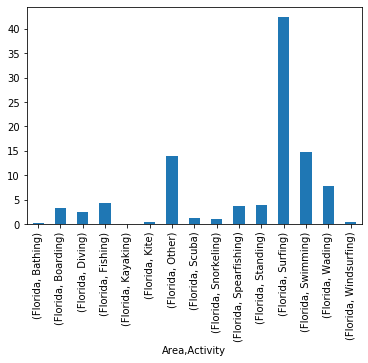

In [40]:
# The previous information inserted in a bar chart
display(Florida_danger_activities['% Frequency'].sort_index().plot.bar())

##  Surfing is really so risky?

We have seen that surfers in Florida are the most likely to receive shark attacks.
But what risk do they really run? Is the mortality rate comparable to other activities?

In [41]:
# Mortality is really low compared to the total number of cases.
# Are the 21 deaths among the population of surfers? Try to figure out
df_Florida['Fatal (Y/N)'].value_counts()

N          871
Y           21
UNKNOWN      6
Name: Fatal (Y/N), dtype: int64

In [42]:
# Create a table and group it by activity and fatality
Florida_danger_fatality = df_Florida.groupby(['Activity', 'Fatal (Y/N)']).agg({'Activity': 'count'})
Florida_danger_fatality.sort_index().head(10)
# Show the %
Florida_danger_fatality['% Fatality'] = Florida_danger_fatality.groupby(level = 0).apply( lambda x: 100*x/x.sum())
Florida_danger_fatality.head(10)
# You can see that there are no surfers dead, other activities have a significantly higher mortality rate

Activity  % Fatality
Activity Fatal (Y/N)                      
Bathing  N                   3  100.000000
Boarding N                  31  100.000000
Diving   N                  16   88.888889
         Y                   2   11.111111
Fishing  N                  39  100.000000
Kayaking N                   1  100.000000
Kite     N                   3   75.000000
         Y                   1   25.000000
Other    N                 108   94.736842
         UNKNOWN             1    0.877193

In [43]:
# Previous table shown in this graph
# IMPORTANT: NOW THIS CODE DOESN'T WORK! TRY TO FIGURE OUT

#Florida_danger_fatality.groupby(['Activity',"Fatal (Y/N)"]).agg({"Fatal (Y/N)":"count"}).groupby(level=0).apply(
#    lambda x: 100 * x / x.sum()
#).unstack().plot(kind='bar',stacked=True)


##  No surfers killed in nearly 400 attacks? Florida surfers are very lucky!
The type of sport probably influences this data. The surfer's body is not particularly exposed, so that most of the shark wounds are in the lower limbs.# 

In [44]:
df_Surfer = df_Florida[(df_Florida["Activity"] == 'Surfing')]

In [45]:
graph_surfer = df_Surfer.groupby(['Injury']).agg({'Injury': 'count'})
graph_surfer = graph_surfer.rename(columns={"Injury":"T.Injury"})
graph_surfer.sort_values('T.Injury', ascending= False).head(10)

,T.Injury
Injury,
Foot,151
Hand,47
Leg,27
Ankle,25
Foot Ankle,21
Unknown,16
Arm,16
Calf,13
Heel,9


In [46]:
# The result on Florida surfers may seem strange. 
# Let's go back and compare it with surfers in Australia to validate the hypothesis

In [47]:
All_Surfer = small_df[(small_df["Activity"] == 'Surfing')]
Australian_Surfer = All_Surfer[(All_Surfer["Country"] == 'AUSTRALIA')]

In [48]:
Australian_Surfer = Australian_Surfer.rename(columns={"Activity":"Activities"})
#Australian_Surfer['Fatal (Y/N)'].value_counts()
Australian_Surfer = Australian_Surfer.groupby(['Activities', 'Fatal (Y/N)']).agg({'Fatal (Y/N)': 'count'})
# Show the %
Australian_Surfer = Australian_Surfer.rename(columns={"Fatal (Y/N)":"% Fatality"})
Australian_Surfer['% Fatality'] = Australian_Surfer.groupby(level = 0).apply( lambda x: 100*x/x.sum())
display(Australian_Surfer.head())

% Fatality
Activities Fatal (Y/N)            
Surfing    N             91.379310
           UNKNOWN        0.862069
           Y              7.758621

##  Conclusion
Contrary to what one might think, the number of surfers who die from shark attacks every year is particularly low, also in relation to other sports activities. Australia's deaths out of the total are less than 8% of the total.
The Florida data is surprising:
Surfers having fun in these waters are particularly fortunate, no deaths present in the analyzed data, only 3 Unknowns in which we do not know the outcome. But given the premises they will surely be saved!
Surf, it's safe and fun!